<a href="https://colab.research.google.com/github/Surya2218/Assignment/blob/main/Housing_Prices_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/housing_prices_regression.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_bedrooms   238 non-null    float64
 1   year_built     241 non-null    float64
 2   zipcode_dup    230 non-null    float64
 3   zipcode        230 non-null    float64
 4   size_sqft      237 non-null    object 
 5   has_garage     237 non-null    object 
 6   id             230 non-null    object 
 7   has_garden     232 non-null    object 
 8   num_bathrooms  221 non-null    float64
 9   sale_price     238 non-null    float64
dtypes: float64(6), object(4)
memory usage: 20.4+ KB


In [ ]:
df

,num_bedrooms,year_built,zipcode_dup,zipcode,size_sqft,has_garage,id,has_garden,num_bathrooms,sale_price
0,2,2021,110002,110002,1075,Ys,H20000,NaN,3,426113
1,3,1954,560001,560001,1482,Ye,H20001,o,1,293483
2,2,1991,560002,560002,1689,No,H20002,No,2,179736
3,3,1956,110001,110001,1415,Yes,H20003,es,3,462700
4,2,1991,560001,560001,1765,No,H20004,NO,1,272214
...,...,...,...,...,...,...,...,...,...,...
255,2,1950,110001,110001,1402,No,H20012,NO,2,426113
256,2,1991,560002,560002,1689,No,H20002,No,2,179736
257,3,1954,560001,560001,1482,Ye,H20001,o,1,293483
258,3,1974,110003,110003,1239,YES,NaN,NaN,2,701046


In [ ]:
df['num_bedrooms']=df['num_bedrooms'].fillna(df['num_bedrooms'].mean())
df['num_bedrooms']=df['num_bedrooms'].astype(int)
df['num_bedrooms']

,num_bedrooms
0,2
1,3
2,2
3,3
4,2
...,...
255,2
256,2
257,3
258,3


In [ ]:
df['year_built']=df['year_built'].fillna(df['year_built'].mean())
df['year_built']=df['year_built'].astype(int)
df['year_built']

,year_built
0,2021
1,1954
2,1991
3,1956
4,1991
...,...
255,1950
256,1991
257,1954
258,1974


In [ ]:
df['zipcode_dup']=df['zipcode'].fillna(df['zipcode'].mode()[0])
df['zipcode_dup']=df['zipcode_dup'].astype(int)
df['zipcode_dup']

,zipcode_dup
0,110002
1,560001
2,560002
3,110001
4,560001
...,...
255,110001
256,560002
257,560001
258,110003


In [ ]:
df['zipcode']=df['zipcode'].fillna(df['zipcode'].mode()[0])
df['zipcode']=df['zipcode'].astype(int)
df['zipcode']

,zipcode
0,110002
1,560001
2,560002
3,110001
4,560001
...,...
255,110001
256,560002
257,560001
258,110003


In [ ]:
df['num_bathrooms']=df['num_bathrooms'].fillna(df['num_bathrooms'].mode()[0])
df['num_bathrooms']=df['num_bathrooms'].astype(int)
df['num_bathrooms']

,num_bathrooms
0,3
1,1
2,2
3,3
4,1
...,...
255,2
256,2
257,1
258,2


In [ ]:
df['sale_price']=df['sale_price'].fillna(df['sale_price'].mean())
df['sale_price']=df['sale_price'].astype(int)
df['sale_price']

,sale_price
0,426113
1,293483
2,179736
3,462700
4,272214
...,...
255,426113
256,179736
257,293483
258,701046


In [ ]:
df['size_sqft']=pd.to_numeric(df['size_sqft'],errors='coerce')
df['size_sqft']=df['size_sqft'].fillna(df['size_sqft'].median())
df['size_sqft']

,size_sqft
0,1075.0
1,1482.0
2,1689.0
3,1415.0
4,1765.0
...,...
255,1402.0
256,1689.0
257,1482.0
258,1239.0


In [ ]:
df["has_garden"].replace({'Yes': 'Yes', 'Ye': 'Yes', 'Ys': 'Yes', 'YES': 'Yes', 'es': 'Yes','No': 'No', 'N': 'No', 'NO': 'No', 'o': 'No' },inplace=True)
df["has_garden"].fillna(df["has_garden"].mode()[0], inplace=True)
df['has_garden']

,has_garden
0,No
1,No
2,No
3,Yes
4,No
...,...
255,No
256,No
257,No
258,No


In [ ]:
df['has_garage'].replace({'Yes': 'Yes', 'Ye': 'Yes', 'Ys': 'Yes', 'YES': 'Yes', 'es': 'Yes','No': 'No', 'N': 'No', 'NO': 'No', 'o': 'No' },inplace=True)
df['has_garage'].fillna(df['has_garage'].mode()[0], inplace=True)
df['has_garage']

/tmp/ipython-input-371806439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_garage'].replace({'Yes': 'Yes', 'Ye': 'Yes', 'Ys': 'Yes', 'YES': 'Yes', 'es': 'Yes','No': 'No', 'N': 'No', 'NO': 'No', 'o': 'No' },inplace=True)


,has_garage
0,Yes
1,Yes
2,No
3,Yes
4,No
...,...
255,No
256,No
257,Yes
258,Yes


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(250, 10)

In [ ]:
df

,num_bedrooms,year_built,zipcode_dup,zipcode,size_sqft,has_garage,id,has_garden,num_bathrooms,sale_price
0,2,2021,110002,110002,1075.0,Yes,H20000,No,3,426113
1,3,1954,560001,560001,1482.0,Yes,H20001,No,1,293483
2,2,1991,560002,560002,1689.0,No,H20002,No,2,179736
3,3,1956,110001,110001,1415.0,Yes,H20003,Yes,3,462700
4,2,1991,560001,560001,1765.0,No,H20004,No,1,272214
...,...,...,...,...,...,...,...,...,...,...
245,2,1990,110002,110002,1013.0,No,H20245,Yes,2,248078
246,5,1982,110001,110001,1907.0,No,H20246,No,1,708685
247,2,1965,110001,110001,1495.0,Yes,H20247,No,3,487109
248,2,1972,560002,560002,1760.0,No,H20248,No,3,498054


In [ ]:
df["id"].unique()


# Drop rows where 'id' is NaN
df.dropna(subset=["id"], inplace=True)
df
df["id"].unique()

array(['H20000', 'H20001', 'H20002', 'H20003', 'H20004', 'H20005',
       'H20006', 'H20007', 'H20008', 'H20009', 'H20010', 'H20011',
       'H20012', 'H20013', 'H20014', 'H20016', 'H20017', 'H20018',
       'H20019', 'H20021', 'H20022', 'H20024', 'H20025', 'H20026',
       'H20027', 'H20028', 'H20029', 'H20030', 'H20031', 'H20032',
       'H20033', 'H20034', 'H20035', 'H20036', 'H20037', 'H20038',
       'H20040', 'H20041', 'H20042', 'H20044', 'H20045', 'H20046',
       'H20047', 'H20048', 'H20050', 'H20051', 'H20052', 'H20053',
       'H20054', 'H20055', 'H20056', 'H20057', 'H20058', 'H20059',
       'H20060', 'H20062', 'H20063', 'H20064', 'H20065', 'H20066',
       'H20068', 'H20069', 'H20070', 'H20072', 'H20073', 'H20074',
       'H20075', 'H20076', 'H20077', 'H20078', 'H20079', 'H20080',
       'H20081', 'H20082', 'H20083', 'H20084', 'H20085', 'H20086',
       'H20087', 'H20088', 'H20089', 'H20091', 'H20092', 'H20093',
       'H20094', 'H20095', 'H20096', 'H20098', 'H20099', 'H201

In [ ]:
df.isnull().sum()

,0
num_bedrooms,0
year_built,0
zipcode_dup,0
zipcode,0
size_sqft,0
has_garage,0
id,0
has_garden,0
num_bathrooms,0
sale_price,0


In [ ]:
df.to_csv("cleaned_housing_prices.csv",index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_bedrooms   221 non-null    int64  
 1   year_built     221 non-null    int64  
 2   zipcode_dup    221 non-null    int64  
 3   zipcode        221 non-null    int64  
 4   size_sqft      221 non-null    float64
 5   has_garage     221 non-null    object 
 6   id             221 non-null    object 
 7   has_garden     221 non-null    object 
 8   num_bathrooms  221 non-null    int64  
 9   sale_price     221 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 19.0+ KB


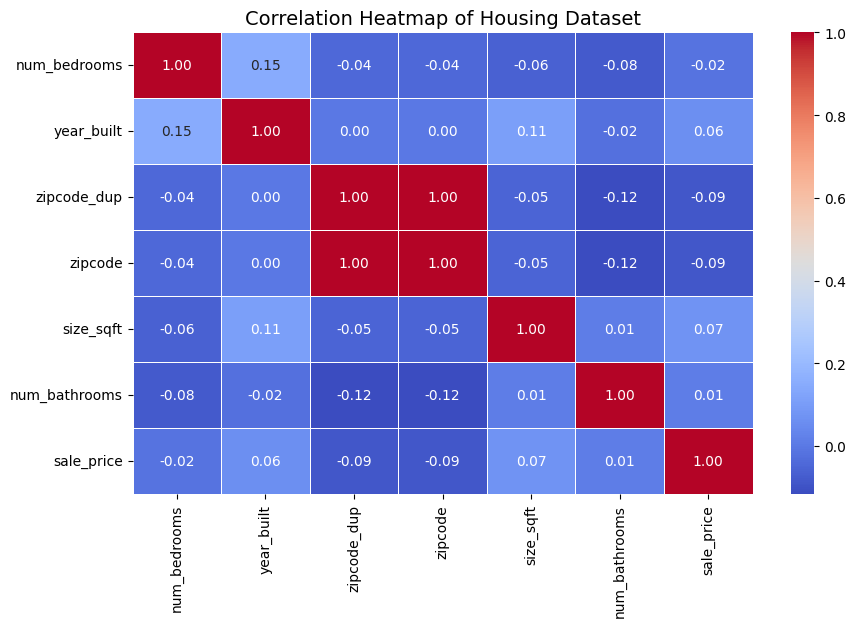

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_housing_prices.csv")
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Housing Dataset", fontsize=14)
plt.show()

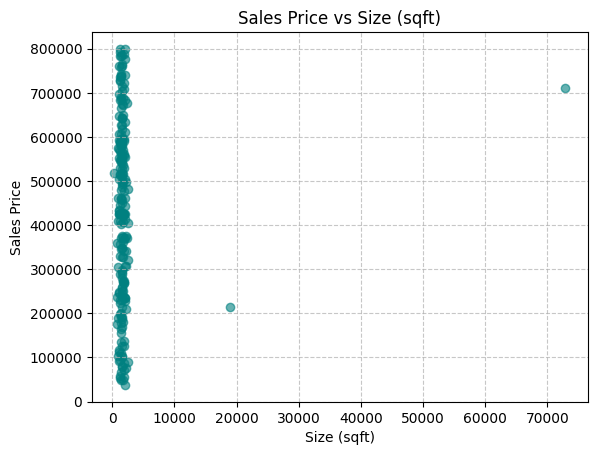

In [ ]:
plt.scatter(df["size_sqft"], df["sale_price"], color="teal", alpha=0.6)
plt.title("Sales Price vs Size (sqft)")
plt.xlabel("Size (sqft)")
plt.ylabel("Sales Price")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2748068879.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["num_bathrooms"] == b]["sale_price"] for b in sorted(df["num_bathrooms"].dropna().unique())],


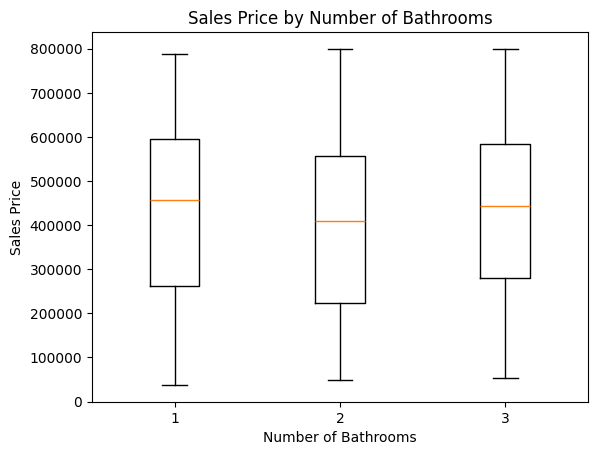

In [ ]:
plt.boxplot([df[df["num_bathrooms"] == b]["sale_price"] for b in sorted(df["num_bathrooms"].dropna().unique())],
            labels=sorted(df["num_bathrooms"].dropna().unique()))
plt.title("Sales Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Sales Price")
plt.show()

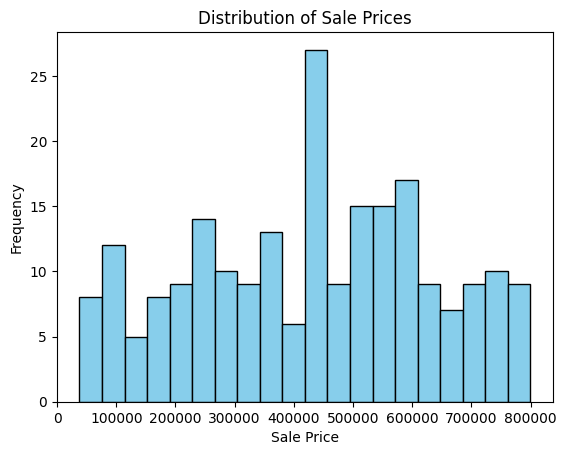

In [ ]:
plt.hist(df["sale_price"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


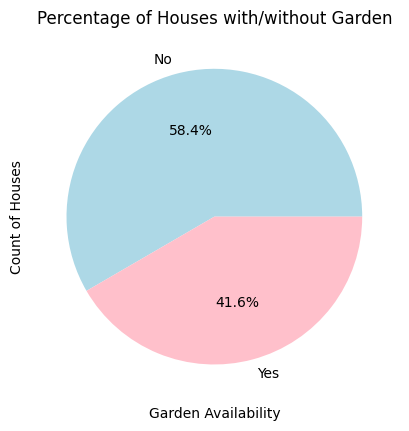

In [ ]:
df["has_garden"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Percentage of Houses with/without Garden")
plt.ylabel("Count of Houses")
plt.xlabel("Garden Availability")
plt.show()

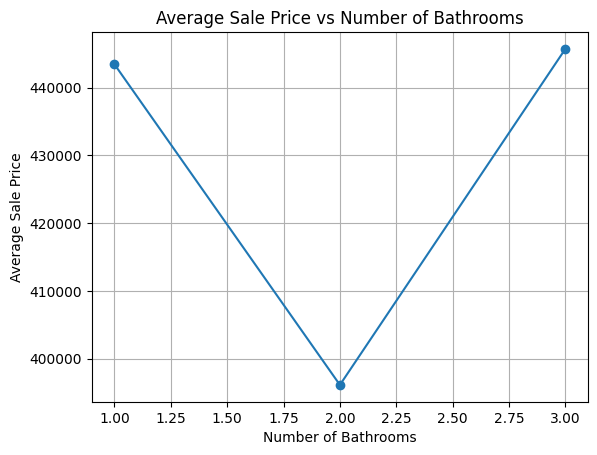

In [ ]:
avg_price = df.groupby("num_bathrooms")["sale_price"].mean()

# Plot line chart
plt.plot(avg_price.index, avg_price.values, marker='o')
plt.title("Average Sale Price vs Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Sale Price")
plt.grid(True)
plt.show()


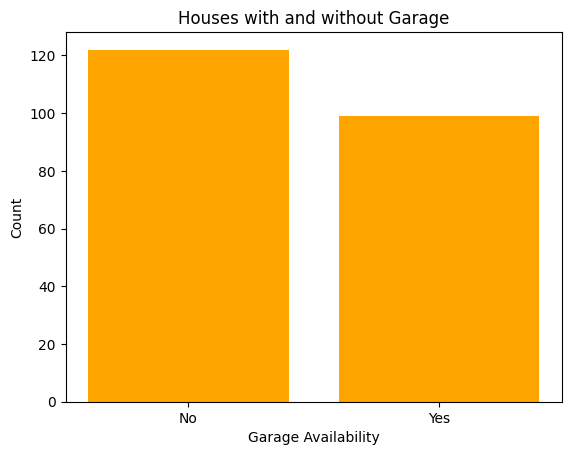

In [ ]:
plt.bar(df["has_garage"].value_counts().index, df["has_garage"].value_counts().values, color="orange")
plt.title("Houses with and without Garage")
plt.xlabel("Garage Availability")
plt.ylabel("Count")
plt.show()


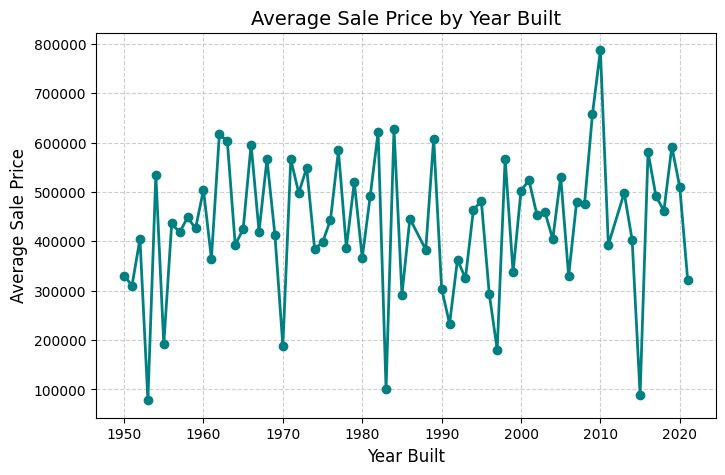

In [ ]:
avg_price_by_year = df.groupby("year_built")["sale_price"].mean().sort_index()
plt.figure(figsize=(8,5))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.title("Average Sale Price by Year Built", fontsize=14)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

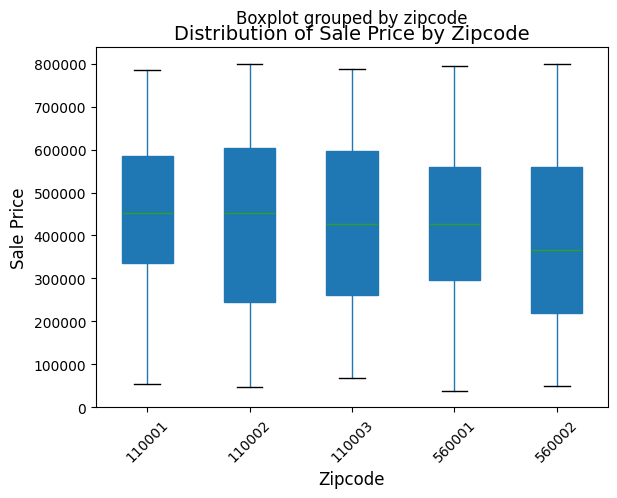

In [ ]:
df.boxplot(column="sale_price", by="zipcode", grid=False, patch_artist=True)
plt.title("Distribution of Sale Price by Zipcode", fontsize=14)
plt.xlabel("Zipcode", fontsize=12)
plt.ylabel("Sale Price", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Analysis Of Our Project**

The data analysis reveals several important insights about the housing market:

1. House size and the number of rooms are strong indicators of higher sale prices.
2. Location (zipcode) significantly influences property values — some areas are much more expensive.
3. Houses with garages or gardens tend to have higher prices compared to those without.
4. The distribution of sale prices is skewed, showing a mix of both affordable and luxury properties.
5. Year built also affects value slightly — newer houses generally command higher prices.

Overall, these findings highlight how multiple features together influence house pricing trends.bold text